In [1]:
knitr::opts_chunk$set(echo = FALSE)

In [3]:
library(tidyverse)
library(jtools)
library(FSA)
library(ggpubr)
library(Hmisc)

### Load Data

In [7]:
df <- read.csv("../stats/dataClean.csv") # Numeric survey data

### Correlation Matrix

In [16]:
# x is a matrix containing the data
# method : correlation method. "pearson"" or "spearman"" is supported
# removeTriangle : remove upper or lower triangle
# results :  if "html" or "latex"
# the results will be displayed in html or latex format
corstars <-function(x, method=c("pearson", "spearman"), removeTriangle=c("upper", "lower"),
                     result=c("none", "html", "latex")){
    #Compute correlation matrix
    require(Hmisc)
    x <- as.matrix(x)
    correlation_matrix<-rcorr(x, type=method[2])
    R <- correlation_matrix$r # Matrix of correlation coeficients
    p <- correlation_matrix$P # Matrix of p-value 
    
    ## Define notions for significance levels; spacing is important.
    mystars <- ifelse(p < .0001, "****", ifelse(p < .001, "*** ", ifelse(p < .01, "**  ", ifelse(p < .05, "*   ", "    "))))
    
    ## trunctuate the correlation matrix to two decimal
    R <- format(round(cbind(rep(-1.11, ncol(x)), R), 2))[,-1]
    
    ## build a new matrix that includes the correlations with their apropriate stars
    Rnew <- matrix(paste(R, mystars, sep=""), ncol=ncol(x))
    diag(Rnew) <- paste(diag(R), " ", sep="")
    rownames(Rnew) <- colnames(x)
    colnames(Rnew) <- paste(colnames(x), "", sep="")
    
    ## remove upper triangle of correlation matrix
    if(removeTriangle[1]=="upper"){
      Rnew <- as.matrix(Rnew)
      Rnew[upper.tri(Rnew, diag = TRUE)] <- ""
      Rnew <- as.data.frame(Rnew)
    }
    
    ## remove lower triangle of correlation matrix
    else if(removeTriangle[1]=="lower"){
      Rnew <- as.matrix(Rnew)
      Rnew[lower.tri(Rnew, diag = TRUE)] <- ""
      Rnew <- as.data.frame(Rnew)
    }
    
    ## remove last column and return the correlation matrix
    Rnew <- cbind(Rnew[1:length(Rnew)-1])
    if (result[1]=="none") return(Rnew)
    else{
      if(result[1]=="html") print(xtable(Rnew), type="html")
      else print(xtable(Rnew), type="latex") 
    }
}

In [17]:
df_corr <- df[, c("Age", "Height", "Weight", "BMI", "Sex", "GT", "GPH_TScore", "GMH_TScore", "totalMET", "avgPEM", "avgAAM", "falling_1", "falling_2", "totalSEE", "OA_check", "totalWOMAC", "Fall_YN", "falls", "time", "right_ankle_max","right_ankle_min", "right_knee_max","right_knee_min", "right_hip_max","right_hip_min", "trunk_lean_max", "trunk_lean_ang_acc", "pelvic_max_y_acc")]
print("Variable name legend")
print("GPH_TScore: Global physical health t-score")
print("GMH_TScore: Global mental health t-score")
print("OA_check: Whether the individual has osteoarthritis (1) or not (0)")

ERROR: Error in `[.data.frame`(df, , c("Age", "Height", "Weight", "BMI", "Sex", : undefined columns selected


In [8]:
df_age50plus <- filter(df, ageGroup == "[50-80+")

In [9]:
# Removed subjects
#df_removed <- df_all[! df_all_text$subjectid %in% df_text$subjectid,]

# Simple data frames
df.descr <- df[, c("Age", "Sex", "Height", "Weight", "BMI", "OA_check", "GPH_TScore", "GMH_TScore")]
df_age50plus.descr <-df_age50plus[, c("Age", "Sex", "Height", "Weight", "BMI", "OA_check", "GPH_TScore", "GMH_TScore")]

describe(df.descr)
describe(df_age50plus.descr)

df.descr 

 8  Variables      405  Observations
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     405        0       65    0.998    37.29    18.78     20.0     21.4 
     .25      .50      .75      .90      .95 
    24.0     29.0     51.0     65.6     71.8 

lowest : 18 19 20 21 22, highest: 83 84 92 94 96
--------------------------------------------------------------------------------
Sex 
       n  missing distinct     Info      Sum     Mean      Gmd 
     405        0        2    0.748      214   0.5284   0.4996 

--------------------------------------------------------------------------------
Height 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     405        0       22    0.994    67.35    4.526     62.0     62.0 
     .25      .50      .75      .90      .95 
    64.0     67.0     70.0     73.0     73.8 

lowest : 55 56 57 59 60, highest: 7

df_age50plus.descr 

 8  Variables      106  Observations
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     106        0       35    0.998    64.07    11.55    51.00    53.00 
     .25      .50      .75      .90      .95 
   56.00    62.00    69.75    80.00    81.75 

lowest : 50 51 52 53 54, highest: 83 84 92 94 96
--------------------------------------------------------------------------------
Sex 
       n  missing distinct     Info      Sum     Mean      Gmd 
     106        0        2    0.743       58   0.5472   0.5003 

--------------------------------------------------------------------------------
Height 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     106        0       17    0.992    66.54    4.325    61.00    62.00 
     .25      .50      .75      .90      .95 
   64.00    66.50    70.00    71.50    72.75 
                          

In [10]:
summary(df$ageGroup)

   Length     Class      Mode 
      405 character character 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.274   9.142  11.100  11.399  13.397  32.875 

[1] 3.438198

$`[50-80+`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.042  10.508  12.873  13.162  15.403  32.875 

$`18-50)`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.274   8.558  10.663  10.775  12.727  19.042 


[50-80+   18-50) 
4.291997 2.835266


	Welch Two Sample t-test

data:  df$time[row(df)[which(df$ageGroup == "18-50)")]] and df$time[row(df)[which(df$ageGroup == "[50-80+")]]
t = -5.3292, df = 138.83, p-value = 3.891e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.272994 -1.501571
sample estimates:
mean of x mean of y 
 10.77467  13.16195 


[1] -3.272994 -1.501571
attr(,"conf.level")
[1] 0.95

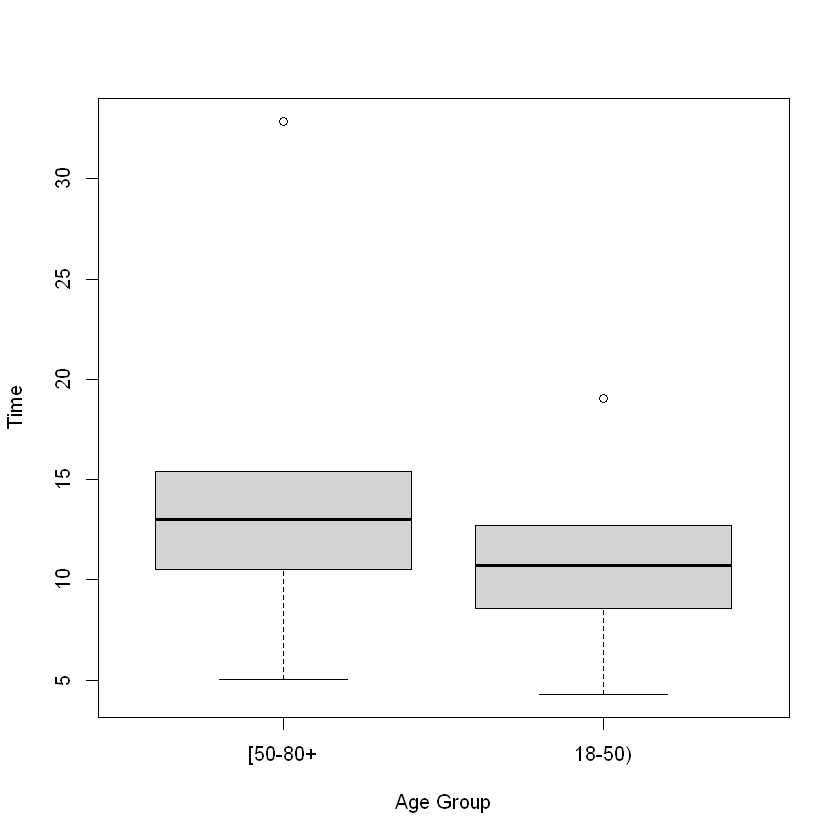

In [11]:
# 18+
summary(df$time)
# Standard deviation
sd(df$time)
# Age bins
tapply(df$time, df$ageGroup, summary)
# Standard deviation
tapply(df$time, df$ageGroup, sd)

# T-tests
x <- t.test(df$time[row(df)[which(df$ageGroup == "18-50)")]], df$time[row(df)[which(df$ageGroup == "[50-80+")]])
x
x$conf.int

# Box Plot
TimeAgeGroup <- tapply(df$time, df$ageGroup, summary)
boxplot(TimeAgeGroup, xlab="Age Group", ylab="Time")

In [23]:
corstars(df[, c("time", "right_knee_max_mean", "trunk_lean_max_ang_acc_sit2stand", "Age", "Sex", "BMI", "EthBin", "GPH_TScore", "GMH_TScore", "OA_check", "Fall_YN")])
corstars(df_age50plus[, c("time", "right_knee_max_mean", "trunk_lean_max_ang_acc_sit2stand", "GPH_TScore", "GMH_TScore", "OA_check", "Fall_YN")])

,time,right_knee_max_mean,trunk_lean_max_ang_acc_sit2stand,Age,Sex,BMI,EthBin,GPH_TScore,GMH_TScore,OA_check
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
time,,,,,,,,,,
right_knee_max_mean,0.21****,,,,,,,,,
trunk_lean_max_ang_acc_sit2stand,-0.13**,-0.10*,,,,,,,,
Age,0.23****,-0.16**,-0.03,,,,,,,
Sex,0.01,0.04,0.06,0.05,,,,,,
BMI,0.17***,-0.05,-0.03,0.23****,-0.26****,,,,,
EthBin,0.06,0.06,0.01,0.21****,-0.04,0.19***,,,,
GPH_TScore,-0.14**,0.05,0.01,-0.13**,-0.07,-0.14**,0.09,,,
GMH_TScore,0.00,0.01,0.03,0.17***,-0.11*,-0.08,0.08,0.51****,,


,time,right_knee_max_mean,trunk_lean_max_ang_acc_sit2stand,GPH_TScore,GMH_TScore,OA_check
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
time,,,,,,
right_knee_max_mean,0.20*,,,,,
trunk_lean_max_ang_acc_sit2stand,-0.20*,-0.19,,,,
GPH_TScore,-0.29**,0.05,0.13,,,
GMH_TScore,-0.08,0.04,0.33***,0.46****,,
OA_check,0.09,-0.08,0.12,0.05,0.14,
Fall_YN,0.26**,-0.18,0.04,-0.11,0.05,0.10


In [12]:
df_new <- df[, colnames(df[,sapply(df,is.numeric)])]

In [25]:
# drop <- c("ageBin", "ageGroup")
# df_new = df[, !(names(df) %in% drop)]
R = corstars(df_new)
# write.csv(R, "stats/correlationMatrix.csv")

In [13]:
# Time predict GPH - control for age, sex, BMI
summ(lm(df$GPH_TScore ~ scale(df$time) + scale(df$Age) + df$Sex + scale(df$BMI)),confint = TRUE, digits = 3)

# Trunk lean max predict ethnicity status - control for time, age, sex, BMI
# Kruskal-Wallis test
## Because one ethnic group not normally distributed
df.eth <- rbind(cbind(df$trunk_lean_max_mean_sit2stand[which(df$Ethnicity==1)], df$time[which(df$Ethnicity==1)], "White"), cbind(df$trunk_lean_max_mean_sit2stand[which(df$Ethnicity==2)], df$time[which(df$Ethnicity==2)], "Black"),  cbind(df$trunk_lean_max_mean_sit2stand[which(df$Ethnicity==3)], df$time[which(df$Ethnicity==3)], "Hispanic"), cbind(df$trunk_lean_max_mean_sit2stand[which(df$Ethnicity==4)], df$time[which(df$Ethnicity==4)], "Asian"))
df.eth <- data.frame(df.eth)
colnames(df.eth) <- c("trunk.lean", "time", "ethnicity")
df.eth$ethnicity <- as.factor(df.eth$ethnicity)
df.eth$trunk.lean <- as.numeric(df.eth$trunk.lean)
df.eth$time <- as.numeric(df.eth$time)

## Compute summary statistics
group_by(df.eth, ethnicity) %>%
  summarise(
    count = n(),
    mean = mean(trunk.lean, na.rm = TRUE),
    sd = sd(trunk.lean, na.rm = TRUE),
    median = median(trunk.lean, na.rm = TRUE),
    IQR = IQR(trunk.lean, na.rm = TRUE)
  )

## Kruskal-Wallis
kruskal.test(trunk.lean ~ ethnicity, data = df.eth)

## Dunn's Test with Bonferroni correction for p-values
dunnTest(trunk.lean ~ ethnicity, data = df.eth, method = "bh")

# Control for other variables
df.eth.bin <- data.frame(rbind(cbind(df$trunk_lean_max_mean_sit2stand[which(df$Ethnicity==1)], df$time[which(df$Ethnicity==1)], df$Age[which(df$Ethnicity==1)], df$Sex[which(df$Ethnicity==1)], df$BMI[which(df$Ethnicity==1)], df$GPH_TScore[which(df$Ethnicity==1)], 0), cbind(df$trunk_lean_max_mean_sit2stand[which(df$Ethnicity==4)], df$time[which(df$Ethnicity==4)], df$Age[which(df$Ethnicity==4)], df$Sex[which(df$Ethnicity==4)], df$BMI[which(df$Ethnicity==4)], df$GPH_TScore[which(df$Ethnicity==4)], 1)))
colnames(df.eth.bin) <- c("trunk.lean", "time", "Age", "Sex", "BMI", "health", "ethnicity")

## Binned ethnicity
mod2 <- glm(formula = df.eth.bin$ethnicity ~ scale(df.eth.bin$trunk.lean) + scale(df.eth.bin$time) + scale(df.eth.bin$Age) + df.eth.bin$Sex + scale(df.eth.bin$BMI) + scale(df.eth.bin$health))

summary(mod2, family = "binomial")
confint(mod2)
exp(coef(mod2))

# OA status
# Trunk lean max predict OA status - control for time, age, sex, BMI

mod3 <- glm(df$OA_check ~ scale(df$time) + scale(df$Age) + df$Sex + scale(df$BMI))

summary(mod3, family = "binomial")
confint(mod3)
exp(coef(mod3))

mod4 <- glm(df$OA_check ~ scale(df$trunk_lean_max_mean_sit2stand) + scale(df$time) + scale(df$Age) + df$Sex + scale(df$BMI))

summary(mod4, family = "binomial")
confint(mod4)
exp(coef(mod4))

# Fall status
# Trunk lean max predict OA status - control for time, age, sex, BMI

mod5 <- glm(df$Fall_YN ~ scale(df$time) + scale(df$Age) + df$Sex + scale(df$BMI))

summary(mod5, family = "binomial")
confint(mod5)
exp(coef(mod5))

mod6 <- glm(df$Fall_YN ~ scale(df$trunk_lean_max_mean_sit2stand) + scale(df$time) + scale(df$Age) + df$Sex + scale(df$BMI))

summary(mod6, family = "binomial")
confint(mod6)
exp(coef(mod6))

# Global mental health
# Trunk acceleration max predict GMH - control for time, age, sex, BMI
mod4 <- lm(df_age50plus$GMH_TScore ~ scale(df_age50plus$trunk_lean_max_ang_acc_sit2stand) + scale(df_age50plus$time) + scale(df_age50plus$Age) + df_age50plus$Sex + scale(df_age50plus$BMI))

summ(mod4,confint = TRUE, digits = 3)
confint(mod4)

MODEL INFO:
Observations: 405
Dependent Variable: df$GPH_TScore
Type: OLS linear regression 

MODEL FIT:
F(4,400) = 8.294, p = 0.000
R² = 0.077
Adj. R² = 0.067 

Standard errors: OLS
-----------------------------------------------------------------
                         Est.     2.5%    97.5%    t val.       p
-------------------- -------- -------- -------- --------- -------
(Intercept)            55.499   54.583   56.415   119.117   0.000
scale(df$time)         -0.938   -1.610   -0.267    -2.747   0.006
scale(df$Age)          -0.405   -1.079    0.269    -1.180   0.239
df$Sex                 -1.209   -2.482    0.064    -1.866   0.063
scale(df$BMI)          -1.108   -1.764   -0.451    -3.319   0.001
-----------------------------------------------------------------

ethnicity,count,mean,sd,median,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Asian,103,197.5701,7.606600,197.1668,9.110451
Black,14,206.6525,9.526660,207.1344,11.491791
Hispanic,16,197.2712,4.648128,196.5225,4.907014
White,243,201.6070,8.501176,199.8839,9.542157



	Kruskal-Wallis rank sum test

data:  trunk.lean by ethnicity
Kruskal-Wallis chi-squared = 25.474, df = 3, p-value = 1.229e-05


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Benjamini-Hochberg method.




        Comparison          Z      P.unadj        P.adj
1    Asian - Black -3.6530798 2.591137e-04 0.0007773411
2 Asian - Hispanic  0.1716145 8.637406e-01 0.8637406044
3 Black - Hispanic  2.9693786 2.984027e-03 0.0059680543
4    Asian - White -4.0248938 5.700102e-05 0.0003420061
5    Black - White  2.0641531 3.900321e-02 0.0585048093
6 Hispanic - White -2.0121872 4.420020e-02 0.0530402440


Call:
glm(formula = df.eth.bin$ethnicity ~ scale(df.eth.bin$trunk.lean) + 
    scale(df.eth.bin$time) + scale(df.eth.bin$Age) + df.eth.bin$Sex + 
    scale(df.eth.bin$BMI) + scale(df.eth.bin$health))

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.29081    0.03370   8.630 2.42e-16 ***
scale(df.eth.bin$trunk.lean) -0.08377    0.02348  -3.569 0.000411 ***
scale(df.eth.bin$time)       -0.01848    0.02540  -0.728 0.467294    
scale(df.eth.bin$Age)        -0.04323    0.02568  -1.683 0.093262 .  
df.eth.bin$Sex                0.01308    0.04704   0.278 0.781108    
scale(df.eth.bin$BMI)        -0.11378    0.02439  -4.665 4.45e-06 ***
scale(df.eth.bin$health)     -0.08568    0.02372  -3.612 0.000350 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.1810773)

    Null deviance: 72.338  on 345  degrees of freedom
Residual deviance: 61.385  on 339  d

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.22476060,0.356853490
scale(df.eth.bin$trunk.lean),-0.12978499,-0.037762177
scale(df.eth.bin$time),-0.06827028,0.031300844
scale(df.eth.bin$Age),-0.09357383,0.007109319
df.eth.bin$Sex,-0.07911190,0.105274112
scale(df.eth.bin$BMI),-0.16158267,-0.065972614
scale(df.eth.bin$health),-0.13217881,-0.039188313


(Intercept) scale(df.eth.bin$trunk.lean) 
                   1.3375065                    0.9196395 
      scale(df.eth.bin$time)        scale(df.eth.bin$Age) 
                   0.9816851                    0.9576889 
              df.eth.bin$Sex        scale(df.eth.bin$BMI) 
                   1.0131670                    0.8924564 
    scale(df.eth.bin$health) 
                   0.9178846


Call:
glm(formula = df$OA_check ~ scale(df$time) + scale(df$Age) + 
    df$Sex + scale(df$BMI))

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.084792   0.016978   4.994 8.84e-07 ***
scale(df$time)  0.002402   0.012446   0.193    0.847    
scale(df$Age)   0.121945   0.012493   9.761  < 2e-16 ***
df$Sex         -0.020283   0.023605  -0.859    0.391    
scale(df$BMI)   0.008258   0.012160   0.679    0.497    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.05373271)

    Null deviance: 27.778  on 404  degrees of freedom
Residual deviance: 21.493  on 400  degrees of freedom
AIC: -27.803

Number of Fisher Scoring iterations: 2


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.05151629,0.11806716
scale(df$time),-0.02199093,0.02679524
scale(df$Age),0.09745936,0.14643101
df$Sex,-0.06654757,0.02598078
scale(df$BMI),-0.01557584,0.03209127


(Intercept) scale(df$time)  scale(df$Age)         df$Sex  scale(df$BMI) 
     1.0884903      1.0024050      1.1296922      0.9799209      1.0082919


Call:
glm(formula = df$OA_check ~ scale(df$trunk_lean_max_mean_sit2stand) + 
    scale(df$time) + scale(df$Age) + df$Sex + scale(df$BMI))

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              0.0846683  0.0168655   5.020 7.79e-07
scale(df$trunk_lean_max_mean_sit2stand)  0.0293448  0.0116556   2.518   0.0122
scale(df$time)                          -0.0006647  0.0124233  -0.054   0.9574
scale(df$Age)                            0.1186666  0.0124786   9.510  < 2e-16
df$Sex                                  -0.0200498  0.0234488  -0.855   0.3930
scale(df$BMI)                            0.0076338  0.0120824   0.632   0.5279
                                           
(Intercept)                             ***
scale(df$trunk_lean_max_mean_sit2stand) *  
scale(df$time)                             
scale(df$Age)                           ***
df$Sex                                     
scale(df$BMI)                

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.051612562,0.11772400
scale(df$trunk_lean_max_mean_sit2stand),0.006500186,0.05218933
scale(df$time),-0.025013910,0.02368458
scale(df$Age),0.094208999,0.14312418
df$Sex,-0.066008642,0.02590908
scale(df$BMI),-0.016047228,0.03131490


(Intercept) scale(df$trunk_lean_max_mean_sit2stand) 
                              1.0883560                               1.0297796 
                         scale(df$time)                           scale(df$Age) 
                              0.9993356                               1.1259944 
                                 df$Sex                           scale(df$BMI) 
                              0.9801499                               1.0076630


Call:
glm(formula = df$Fall_YN ~ scale(df$time) + scale(df$Age) + df$Sex + 
    scale(df$BMI))

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.14957    0.02682   5.576 4.53e-08 ***
scale(df$time)  0.04586    0.01966   2.332   0.0202 *  
scale(df$Age)   0.02662    0.01974   1.349   0.1781    
df$Sex          0.02535    0.03729   0.680   0.4971    
scale(df$BMI)  -0.02732    0.01921  -1.422   0.1558    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.1341111)

    Null deviance: 55.244  on 404  degrees of freedom
Residual deviance: 53.644  on 400  degrees of freedom
AIC: 342.63

Number of Fisher Scoring iterations: 2


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.096999941,0.20213962
scale(df$time),0.007322948,0.08439726
scale(df$Age),-0.012060442,0.06530690
df$Sex,-0.047743053,0.09843687
scale(df$BMI),-0.064973819,0.01033256


(Intercept) scale(df$time)  scale(df$Age)         df$Sex  scale(df$BMI) 
     1.1613345      1.0469279      1.0269808      1.0256709      0.9730492


Call:
glm(formula = df$Fall_YN ~ scale(df$trunk_lean_max_mean_sit2stand) + 
    scale(df$time) + scale(df$Age) + df$Sex + scale(df$BMI))

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                              0.149584   0.026854   5.570 4.69e-08
scale(df$trunk_lean_max_mean_sit2stand) -0.003392   0.018559  -0.183    0.855
scale(df$time)                           0.046215   0.019781   2.336    0.020
scale(df$Age)                            0.027002   0.019869   1.359    0.175
df$Sex                                   0.025320   0.037337   0.678    0.498
scale(df$BMI)                           -0.027249   0.019238  -1.416    0.157
                                           
(Intercept)                             ***
scale(df$trunk_lean_max_mean_sit2stand)    
scale(df$time)                          *  
scale(df$Age)                              
df$Sex                                     
scale(df$BMI)                        

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.096950356,0.20221775
scale(df$trunk_lean_max_mean_sit2stand),-0.039767015,0.03298254
scale(df$time),0.007444001,0.08498525
scale(df$Age),-0.011940901,0.06594537
df$Sex,-0.047859103,0.09849891
scale(df$BMI),-0.064955206,0.01045818


(Intercept) scale(df$trunk_lean_max_mean_sit2stand) 
                              1.1613511                               0.9966135 
                         scale(df$time)                           scale(df$Age) 
                              1.0472992                               1.0273701 
                                 df$Sex                           scale(df$BMI) 
                              1.0256432                               0.9731194

MODEL INFO:
Observations: 106
Dependent Variable: df_age50plus$GMH_TScore
Type: OLS linear regression 

MODEL FIT:
F(5,100) = 3.544, p = 0.005
R² = 0.151
Adj. R² = 0.108 

Standard errors: OLS
----------------------------------------------------------------------------
                                                               Est.     2.5%
---------------------------------------------------------- -------- --------
(Intercept)                                                  55.643   53.726
scale(df_age50plus$trunk_lean_max_ang_acc_sit2stand)          1.705    0.376
scale(df_age50plus$time)                                     -0.136   -1.569
scale(df_age50plus$Age)                                       0.803   -0.632
df_age50plus$Sex                                             -1.874   -4.492
scale(df_age50plus$BMI)                                      -1.539   -2.898
----------------------------------------------------------------------------
 
-----------------------------------

,2.5 %,97.5 %
(Intercept),53.7256754,57.5607454
scale(df_age50plus$trunk_lean_max_ang_acc_sit2stand),0.3757393,3.0344779
scale(df_age50plus$time),-1.5689984,1.2968607
scale(df_age50plus$Age),-0.6324504,2.2384360
df_age50plus$Sex,-4.4917362,0.7441394
scale(df_age50plus$BMI),-2.8983490,-0.1797021


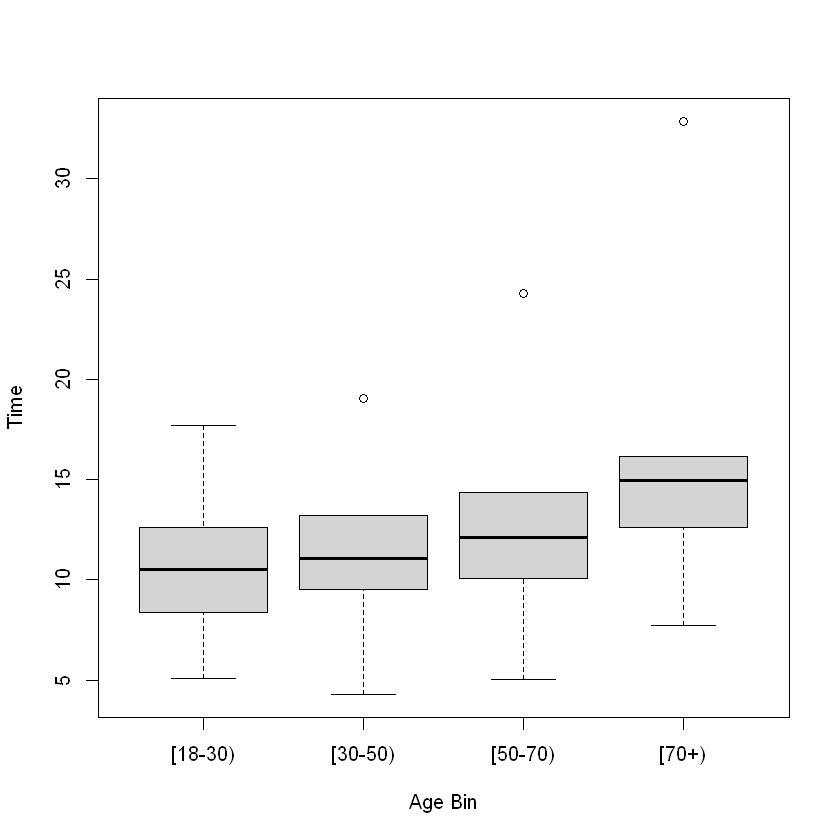

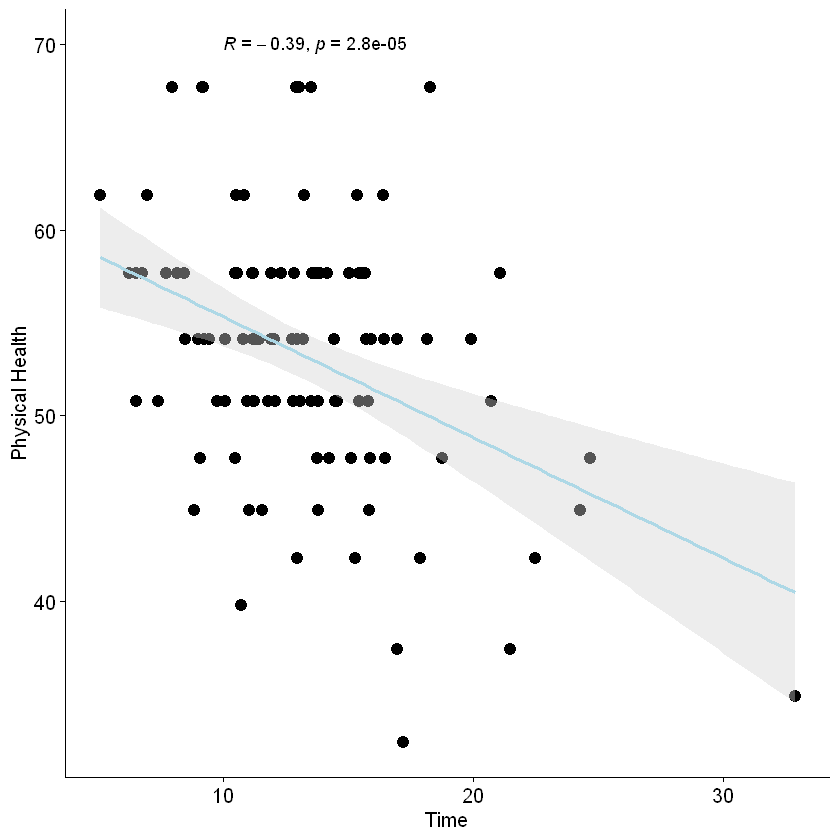

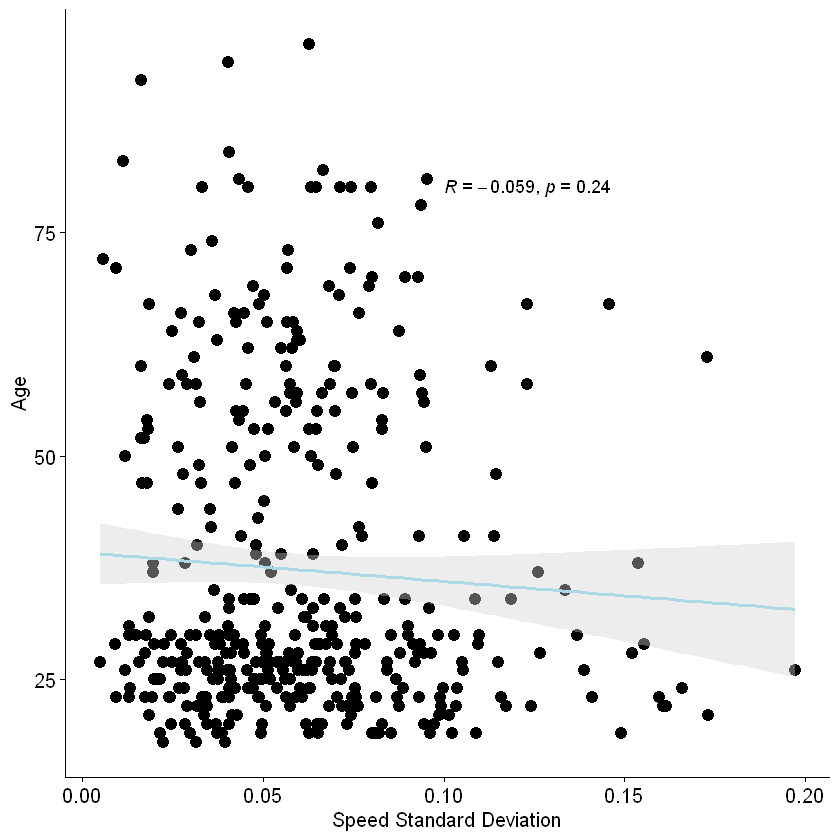

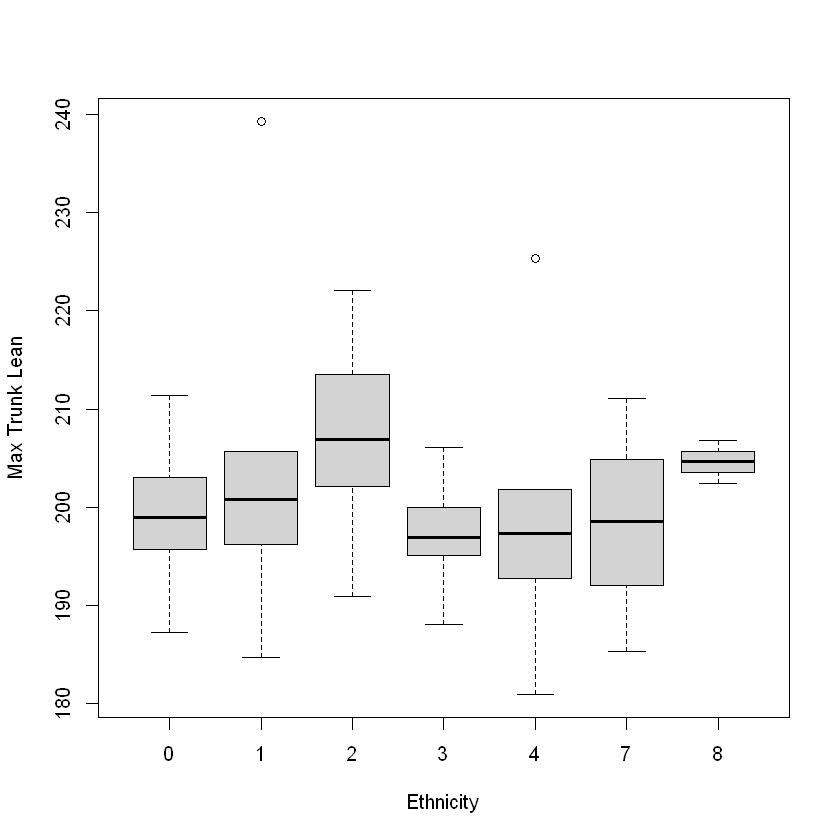


	Welch Two Sample t-test

data:  df$trunk_lean_max_mean_sit2stand[row(df)[which(df$OA_check == 0)]] and df$trunk_lean_max_mean_sit2stand[row(df)[which(df$OA_check == 1)]]
t = -2.8691, df = 31.557, p-value = 0.007283
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.920106 -1.680047
sample estimates:
mean of x mean of y 
 200.0229  205.8230 


[1] -9.920106 -1.680047
attr(,"conf.level")
[1] 0.95

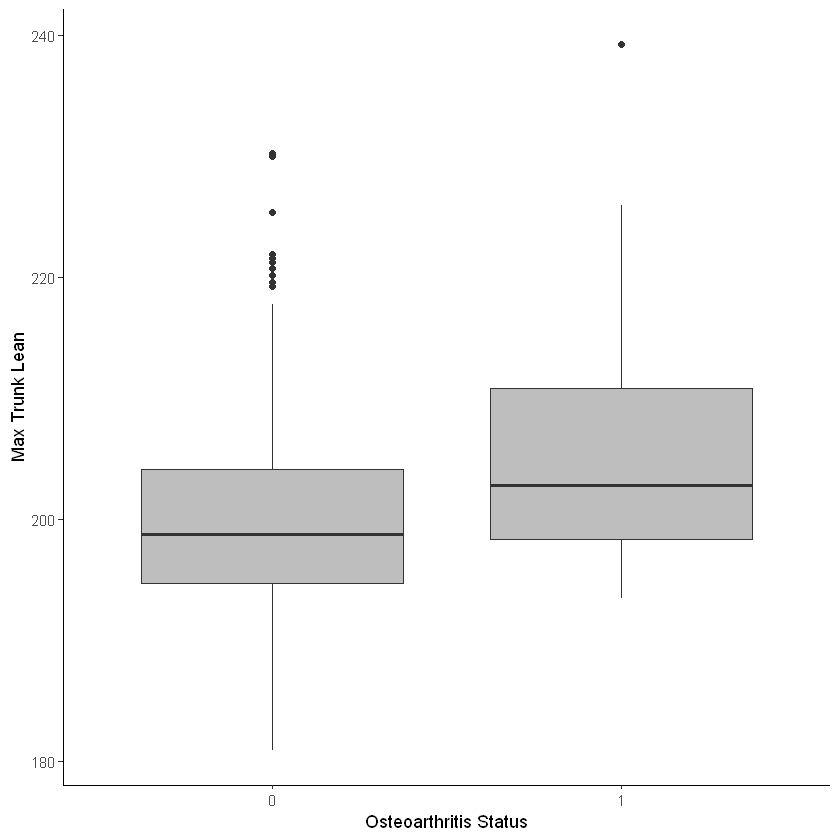


	Welch Two Sample t-test

data:  df$trunk_lean_max_mean_sit2stand[row(df)[which(df$Fall_YN == 0)]] and df$trunk_lean_max_mean_sit2stand[row(df)[which(df$Fall_YN == 1)]]
t = -0.32842, df = 96.456, p-value = 0.7433
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.477824  1.774269
sample estimates:
mean of x mean of y 
 200.3952  200.7470 


[1] -2.477824  1.774269
attr(,"conf.level")
[1] 0.95

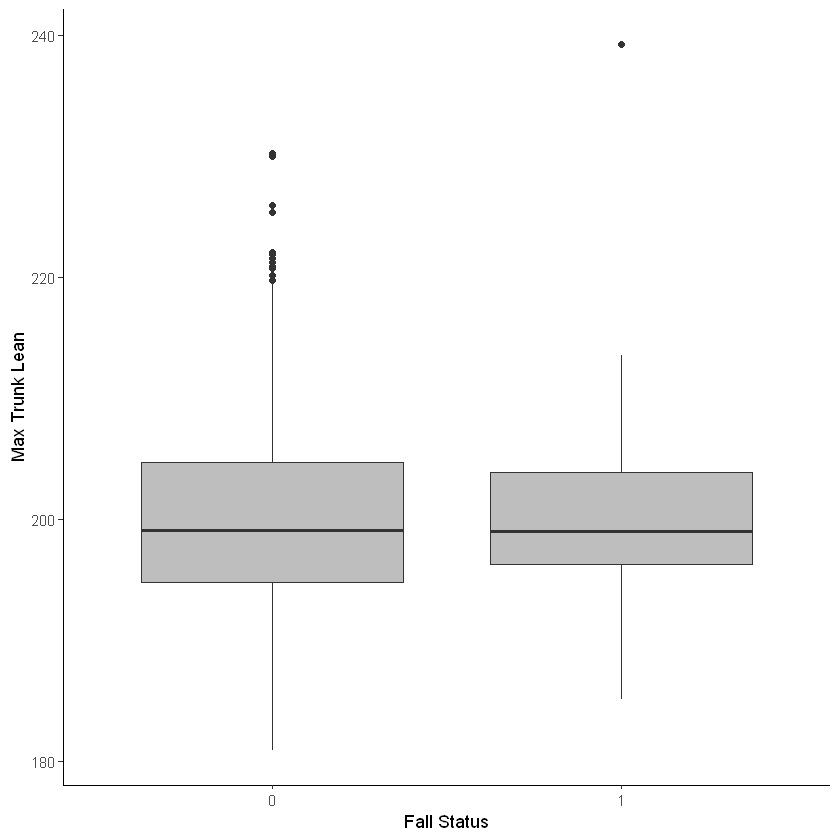

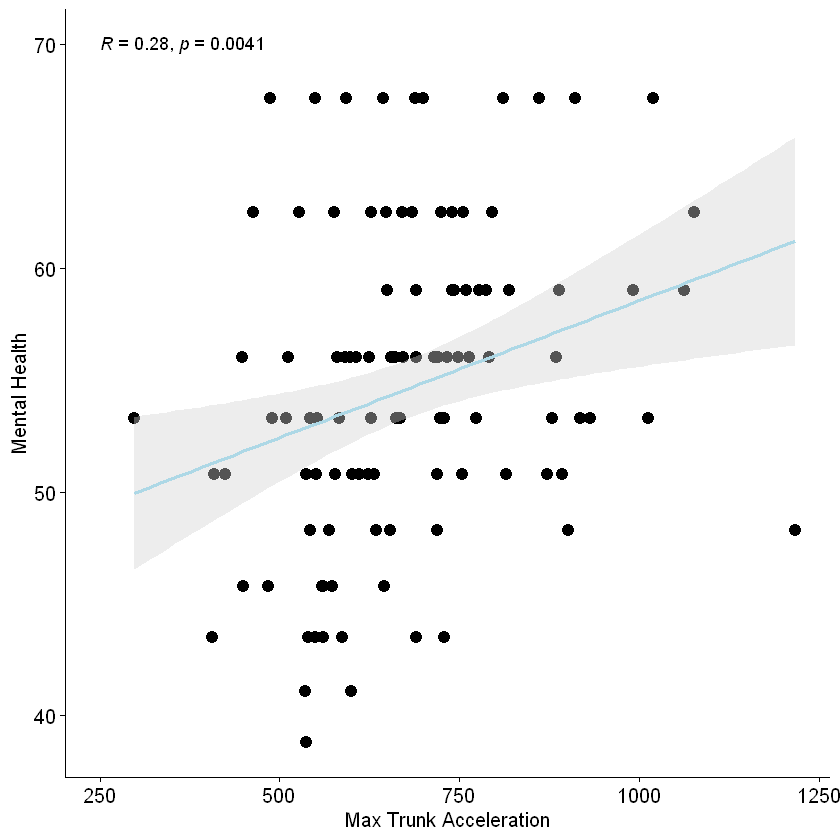

In [14]:
# Age Bins
TimeAgeGroup <- tapply(df$time, df$ageBin, summary)
boxplot(TimeAgeGroup, xlab="Age Bin", ylab="Time")

# Physical health vs. Time
plot1 <- ggscatter(df_age50plus, x = "time", y = "GPH_TScore", xlab = "Time", size = 3, font.label = c(20, "plain"),
  ylab = "Physical Health",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "lightblue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
plot1 + stat_cor(method = "pearson", label.x = 10, label.y = 70)

# Age vs. Right Hip
plot2 <- ggscatter(df, x = "speed_sd", y = "Age", xlab = "Speed Standard Deviation", size = 3, font.label = c(20, "plain"),
  ylab = "Age",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "lightblue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
plot2 + stat_cor(method = "pearson", label.x = 0.1, label.y = 80)

# Ethnicity vs. Trunk lean
TrunkLean_Eth <- tapply(df$trunk_lean_max_mean_sit2stand, df$Ethnicity, summary)
boxplot(TrunkLean_Eth, xlab="Ethnicity", ylab="Max Trunk Lean")

# Osteoarthritis Status vs. trunk angle
df$OA_check.fact <- as.factor(df$OA_check)
ggplot(df, aes(x=OA_check.fact, y=trunk_lean_max_mean_sit2stand)) + 
  geom_boxplot(fill="gray")+
  labs(x="Osteoarthritis Status", y = "Max Trunk Lean")+
  theme_classic()

x <- t.test(df$trunk_lean_max_mean_sit2stand[row(df)[which(df$OA_check == 0)]], df$trunk_lean_max_mean_sit2stand[row(df)[which(df$OA_check == 1)]])
x
x$conf.int

# Fall Status vs. trunk angle
df$Fall_YN.fact <- as.factor(df$Fall_YN)
ggplot(df, aes(x=Fall_YN.fact, y=trunk_lean_max_mean_sit2stand)) + 
  geom_boxplot(fill="gray")+
  labs(x="Fall Status", y = "Max Trunk Lean")+
  theme_classic()

x <- t.test(df$trunk_lean_max_mean_sit2stand[row(df)[which(df$Fall_YN == 0)]], df$trunk_lean_max_mean_sit2stand[row(df)[which(df$Fall_YN == 1)]])
x
x$conf.int

# Mental health vs. Trunk Acceleration
plot3 <- ggscatter(df_age50plus, x = "trunk_lean_max_ang_acc_sit2stand", y = "GMH_TScore", xlab = "Max Trunk Acceleration", size = 3, font.label = c(20, "plain"),
  ylab = "Mental Health",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "lightblue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
plot3 + stat_cor(method = "pearson", label.x = 250, label.y = 70)

In [90]:
all.cors.p <- data.frame(cor.test(df$time,df$Age)$p.value, cor.test(df$time,df$Sex)$p.value, cor.test(df$time,df$BMI)$p.value, cor.test(df$time,df$EthBin)$p.value, cor.test(df$time,df$GPH_TScore)$p.value, cor.test(df$time,df$GMH_TScore)$p.value, cor.test(df$time,df$OA_check)$p.value, cor.test(df$trunk_lean_max_mean_sit2stand,df$Age)$p.value, cor.test(df$trunk_lean_max_mean_sit2stand,df$Sex)$p.value, cor.test(df$trunk_lean_max_mean_sit2stand,df$EthBin)$p.value, cor.test(df$trunk_lean_max_mean_sit2stand,df$BMI)$p.value, cor.test(df$trunk_lean_max_mean_sit2stand,df$GPH_TScore)$p.value, cor.test(df$trunk_lean_max_mean_sit2stand,df$GMH_TScore)$p.value, cor.test(df$trunk_lean_max_mean_sit2stand,df$OA_check)$p.value, cor.test(df$trunk_lean_max_ang_acc_sit2stand,df$Age)$p.value, cor.test(df$trunk_lean_max_ang_acc_sit2stand,df$Sex)$p.value, cor.test(df$trunk_lean_max_ang_acc_sit2stand,df$BMI)$p.value, cor.test(df$trunk_lean_max_ang_acc_sit2stand,df$EthBin)$p.value,  cor.test(df$trunk_lean_max_ang_acc_sit2stand,df$GPH_TScore)$p.value, cor.test(df$trunk_lean_max_ang_acc_sit2stand,df$GMH_TScore)$p.value, cor.test(df$trunk_lean_max_ang_acc_sit2stand,df$OA_check)$p.value)

all.cors.p.adj <- p.adjust(all.cors.p, method = "fdr", n = length(all.cors.p))
all.cors.p.adj

all.cors.50.p <- data.frame(cor.test(df_age50plus$time,df_age50plus$GPH_TScore)$p.value, cor.test(df_age50plus$time,df_age50plus$GMH_TScore)$p.value, cor.test(df_age50plus$trunk_lean_max_mean_sit2stand,df_age50plus$GPH_TScore)$p.value, cor.test(df_age50plus$trunk_lean_max_mean_sit2stand,df_age50plus$GMH_TScore)$p.value, cor.test(df_age50plus$trunk_lean_max_ang_acc_sit2stand,df_age50plus$GPH_TScore)$p.value, cor.test(df_age50plus$trunk_lean_max_ang_acc_sit2stand,df_age50plus$GMH_TScore)$p.value)

all.cors.50.p.adj <- p.adjust(all.cors.50.p, method = "fdr", n = length(all.cors.50.p))
all.cors.50.p.adj

cor.test.df.time..df.Age..p.value 
                                                        8.763675e-12 
                                   cor.test.df.time..df.Sex..p.value 
                                                        8.933700e-01 
                                   cor.test.df.time..df.BMI..p.value 
                                                        3.395253e-04 
                                cor.test.df.time..df.EthBin..p.value 
                                                        5.812289e-01 
                            cor.test.df.time..df.GPH_TScore..p.value 
                                                        3.395253e-04 
                            cor.test.df.time..df.GMH_TScore..p.value 
                                                        8.933700e-01 
                              cor.test.df.time..df.OA_check..p.value 
                                                        1.414559e-03 
          cor.test.df.trunk_lean_max_mean_sit2stand..df.Age..p.value 
                                                        6.286714e-03 
          cor.test.df.trunk_lean_max_mean_sit2stand..df.Sex..p.value 
                                                        9.750120e-01 
       cor.test.df.trunk_lean_max_mean_sit2stand..df.EthBin..p.value 
                                                        5.923388e-03 
          cor.test.df.trunk_lean_max_mean_sit2stand..df.BMI..p.value 
                                                        4.805543e-01 
   cor.test.df.trunk_lean_max_mean_sit2stand..df.GPH_TScore..p.value 
                                                        8.933700e-01 
   cor.test.df.trunk_lean_max_mean_sit2stand..df.GMH_TScore..p.value 
                                                        4.834272e-01 
     cor.test.df.trunk_lean_max_mean_sit2stand..df.OA_check..p.value 
                                                        1.176072e-03 
       cor.test.df.trunk_lean_max_ang_acc_sit2stand..df.Age..p.value 
                                                        8.933700e-01 
       cor.test.df.trunk_lean_max_ang_acc_sit2stand..df.Sex..p.value 
                                                        6.201558e-01 
       cor.test.df.trunk_lean_max_ang_acc_sit2stand..df.BMI..p.value 
                                                        8.933700e-01 
    cor.test.df.trunk_lean_max_ang_acc_sit2stand..df.EthBin..p.value 
                                                        9.434438e-01 
cor.test.df.trunk_lean_max_ang_acc_sit2stand..df.GPH_TScore..p.value 
                                                        7.551138e-01 
cor.test.df.trunk_lean_max_ang_acc_sit2stand..df.GMH_TScore..p.value 
                                                        9.434438e-01 
  cor.test.df.trunk_lean_max_ang_acc_sit2stand..df.OA_check..p.value 
                                                        4.834272e-01

cor.test.df_age50plus.time..df_age50plus.GPH_TScore..p.value 
                                                                            0.0001706982 
                            cor.test.df_age50plus.time..df_age50plus.GMH_TScore..p.value 
                                                                            0.5700721434 
   cor.test.df_age50plus.trunk_lean_max_mean_sit2stand..df_age50plus.GPH_TScore..p.value 
                                                                            0.0686728498 
   cor.test.df_age50plus.trunk_lean_max_mean_sit2stand..df_age50plus.GMH_TScore..p.value 
                                                                            0.4476807912 
cor.test.df_age50plus.trunk_lean_max_ang_acc_sit2stand..df_age50plus.GPH_TScore..p.value 
                                                                            0.4476807912 
cor.test.df_age50plus.trunk_lean_max_ang_acc_sit2stand..df_age50plus.GMH_TScore..p.value 
                                                                            0.0121589365